In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(filepath):
    try:
        data=pd.read_csv(filepath)
    except UnicodeDecodeError:
        data= pd.read_csv(filepath, encoding= 'ISO-8859-1')

    data=data[['v1','v2']]
    data.columns= ['label','text']

    return data

In [3]:
def preprocess_data(data):
    data['label']= data['label'].map({'ham':0, 'spam':1})
    data= data.drop_duplicates()
    return data

In [4]:
def extract_features(data):
    tfidf= TfidfVectorizer(max_features= 5000, stop_words= 'english')
    X= tfidf.fit_transform(data['text'])
    y= data['label']
    return X,y,tfidf

In [10]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models={
        'Naive Bayes Multinomial': MultinomialNB(),
    }

    results ={}
    for name, models in models.items():
        models.fit(X_train, y_train)
        y_pred= models.predict(X_test)
        accuracy= accuracy_score(y_pred, y_test)
        report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'model': models,
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        
        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(report)
        
        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['ham', 'spam'], 
                    yticklabels=['ham', 'spam'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    return results


In [11]:
def main():
    filepath= r"C:\Users\UAE\Downloads\Abdur Rafay\Datasets\spam.csv"
    data= load_data(filepath)
    print(f"Dataset loaded with {len(data)} emails")
    data= preprocess_data(data)
    print(f'After preprocessing, {len(data)} emails remain')
    print('\nClass Distribution')
    print(data['label'].value_counts())
    X, y, tfidf= extract_features(data)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    # Train and evaluate models
    results = train_and_evaluate(X_train, X_test, y_train, y_test)
    
    # Compare model accuracies
    print("\nModel Comparison:")
    for name, result in results.items():
        print(f"{name}: {result['accuracy']:.4f}")

Dataset loaded with 5572 emails
After preprocessing, 5169 emails remain

Class Distribution
label
0    4516
1     653
Name: count, dtype: int64

Naive Bayes Multinomial Results:
Accuracy: 0.9729
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       903
        spam       0.99      0.79      0.88       131

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



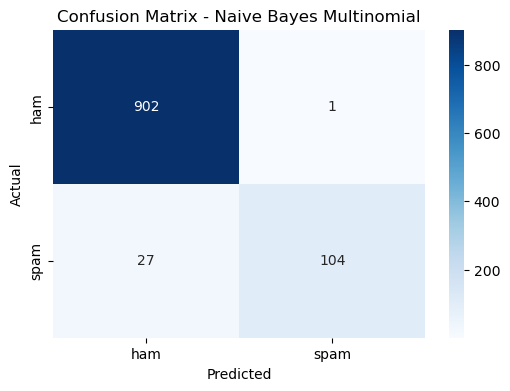


Model Comparison:
Naive Bayes Multinomial: 0.9729


In [12]:
if __name__ == "__main__":
    main()